In [1]:
import python_inventory as pyinv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("data/Animals2.csv")
df

,name,body,brain
0,Mountain beaver,1.350,8.1
1,Cow,465.000,423.0
2,Grey wolf,36.330,119.5
3,Goat,27.660,115.0
4,Guinea pig,1.040,5.5
...,...,...,...
60,Brazilian tapir,160.000,169.0
61,Tenrec,0.900,2.6
62,Phalanger,1.620,11.4
63,Tree shrew,0.104,2.5


In [3]:
log_body = np.log(df['body'].values)
log_brain = np.log(df['brain'].values)

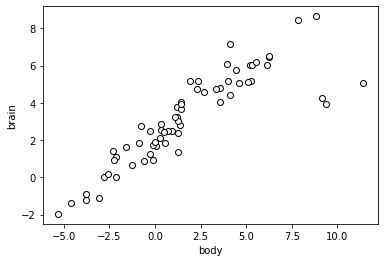

In [4]:
plt.scatter(log_body, log_brain, c='w', edgecolors='k')
plt.xlabel('body')
plt.ylabel('brain')
plt.show()

In [5]:
X = np.c_[log_body, log_brain]
Y = np.zeros(len(log_body), 'd')

In [6]:
loss_func = pyinv.ErrorLoss(pyinv.Square())

In [7]:
line10 = pyinv.TLinearModel(1)
line10.init_param()

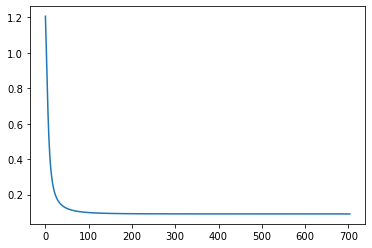

In [8]:
risk1 = pyinv.Risk(line10, loss_func)
gd1 = pyinv.GradientDescent(risk1, n_iter=2000)
gd1.fit(X, Y)

line1 = pyinv.LinearModel(1, line10.param)

plt.plot(gd1.rvals)
plt.show()

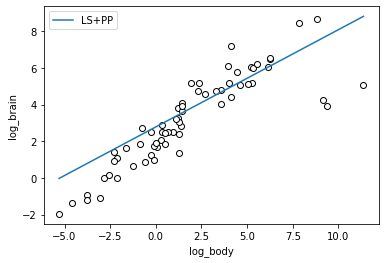

In [9]:
plt.scatter(log_body, log_brain, c='w', edgecolors='k')
XX = np.array([log_body.min(), log_body.max()])
XXs = XX.reshape(-1,1)
plt.plot(XX, line1.evaluate_all(XXs), label='LS+PP')
plt.xlabel('log_body')
plt.ylabel('log_brain')
plt.legend()
plt.show()

In [10]:
line20 = pyinv.TLinearModel(1)
line20.init_param()

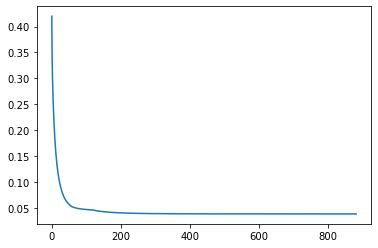

In [11]:
agg = pyinv.WMMean(pyinv.SoftQuantileFunc(pyinv.SoftAbs(0.001), 0.92))
risk2 = pyinv.Risk(line20, loss_func, agg=agg)
gd2 = pyinv.GradientDescent(risk2, n_iter=2000)
gd2.fit(X,Y)

line2 = pyinv.LinearModel(1, line20.param)

plt.plot(gd2.rvals)
plt.show()

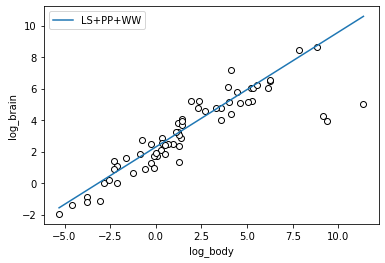

In [12]:
plt.scatter(log_body, log_brain, c='w', edgecolors='k')
XX = np.array([log_body.min(), log_body.max()])
XXs = XX.reshape(-1,1)
plt.plot(XX, line2.evaluate_all(XXs), label='LS+PP+WW')
plt.xlabel('log_body')
plt.ylabel('log_brain')
plt.legend()
plt.show()

In [13]:
X1 = log_body
X1s = X1.reshape(-1,1)
Y1 = log_brain

In [14]:
line3 = pyinv.LinearModel(1)
line3.init_param()

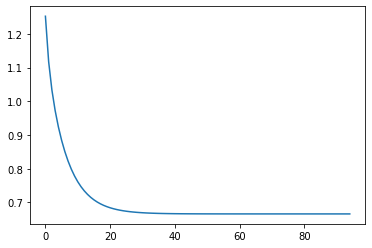

In [15]:
risk3 = pyinv.Risk(line3, loss_func)
gd3 = pyinv.GradientDescent(risk3, n_iter=2000)
gd3.fit(X1s,Y1)

plt.plot(gd3.rvals)
plt.show()

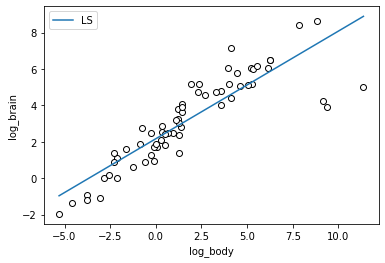

In [16]:
plt.scatter(log_body, log_brain, c='w', edgecolors='k')
XX = np.array([log_body.min(), log_body.max()])
XXs = XX.reshape(-1,1)
plt.plot(XX, line3.evaluate_all(XXs), label='LS')
plt.xlabel('log_body')
plt.ylabel('log_brain')
plt.legend()
plt.show()

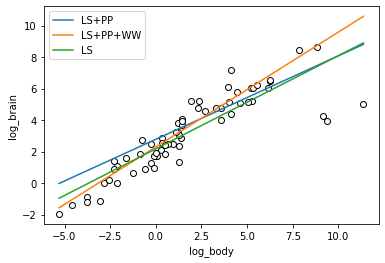

In [17]:
plt.scatter(log_body, log_brain, c='w', edgecolors='k')
XX = np.array([log_body.min(), log_body.max()])
XXs = XX.reshape(-1,1)
plt.plot(XX, line1.evaluate_all(XXs), label='LS+PP')
plt.plot(XX, line2.evaluate_all(XXs), label='LS+PP+WW')
plt.plot(XX, line3.evaluate_all(XXs), label='LS')
plt.xlabel('log_body')
plt.ylabel('log_brain')
plt.legend()
plt.show()

In [18]:
(len(log_body) - 5) / len(log_body)

0.9230769230769231